In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [6]:
# resize all image as a part of data pre-processing.
train = ImageDataGenerator(rescale=1/255, rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1,
                          zoom_range=0.1, horizontal_flip=True, fill_mode='nearest')  
test = ImageDataGenerator(rescale=1/255, rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1,
                          zoom_range=0.1, horizontal_flip=True, fill_mode='nearest')

In [7]:
#flow_from_directory generally "Takes the path to a directory, and generates batches of augmented/normalized data"
train_dataset = train.flow_from_directory("C:/Users/lenovo/OneDrive/Desktop/Forest_Fire_Detection/forest_fire/Training and Validation/",
                                          target_size=(150,150), batch_size = 32, class_mode = 'binary')

Found 1832 images belonging to 2 classes.


In [8]:
test_dataset = test.flow_from_directory("C:/Users/lenovo/OneDrive/Desktop/Forest_Fire_Detection/forest_fire/Testing/",
                                          target_size=(150,150), batch_size =32, class_mode = 'binary')

Found 68 images belonging to 2 classes.


In [9]:
print(test_dataset.class_indices)
print(train_dataset.class_indices)

{'fire': 0, 'nofire': 1}
{'fire': 0, 'nofire': 1}


# Model Building 

Here Model consist four convolutional and Maxpooling layer with one flatten layer and at last it contains two dense layer 

In [10]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation='relu', input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation='relu', input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation='relu', input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(512, activation='relu'))   #we are taking here activation relu (directly give positive or zero.)
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Adam :
that implements the Adam algorithm. it is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments."
# binary crossentropy : 
Used as a loss function for binary classification model. The binary_crossentropy function computes the cross-entropy loss between true labels and predicted labels.

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
CNN_Model = model.fit(train_dataset, epochs = 20, validation_data = test_dataset)

Epoch 1/20
58/58 [==============================] - 34s 551ms/step - loss: 0.3039 - accuracy: 0.8739 - val_loss: 0.2732 - val_accuracy: 0.9265
Epoch 2/20
58/58 [==============================] - 34s 580ms/step - loss: 0.1591 - accuracy: 0.9509 - val_loss: 0.3438 - val_accuracy: 0.8382
Epoch 3/20
58/58 [==============================] - 38s 653ms/step - loss: 0.1368 - accuracy: 0.9541 - val_loss: 0.2974 - val_accuracy: 0.9118
Epoch 4/20
58/58 [==============================] - 36s 613ms/step - loss: 0.1408 - accuracy: 0.9541 - val_loss: 0.2505 - val_accuracy: 0.9118
Epoch 5/20
58/58 [==============================] - 36s 617ms/step - loss: 0.1069 - accuracy: 0.9640 - val_loss: 0.3109 - val_accuracy: 0.8824
Epoch 6/20
58/58 [==============================] - 37s 639ms/step - loss: 0.1213 - accuracy: 0.9612 - val_loss: 0.1877 - val_accuracy: 0.9265
Epoch 7/20
58/58 [==============================] - 39s 666ms/step - loss: 0.0793 - accuracy: 0.9749 - val_loss: 0.1117 - val_accuracy: 0.9412

In [14]:
# Evaluate the loss and accuracy
loss, accuracy = model.evaluate(test_dataset)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

3/3 [==============================] - 1s 215ms/step - loss: 0.0945 - accuracy: 0.9853
Accuracy: 0.9852941036224365
Loss: 0.09446042031049728


In [15]:
prediction = model.predict(test_dataset)
print('Length :', len(prediction))

3/3 [==============================] - 1s 124ms/step
Length : 68


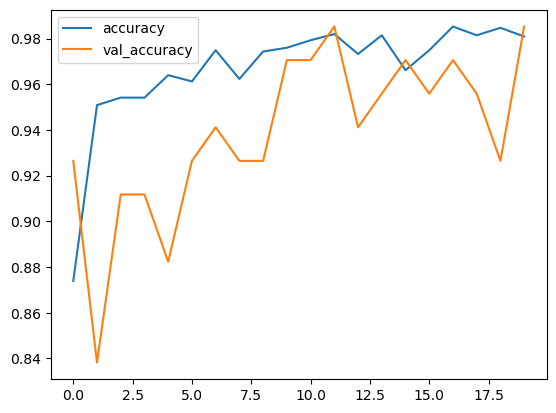

In [16]:
plt.plot(CNN_Model.history['accuracy'], label='accuracy')
plt.plot(CNN_Model.history['val_accuracy'], label='val_accuracy')
plt.legend()

Making a function to see any image from dataset with predicted label

In [17]:
def predictImage(filename):
    img = image.load_img(filename,target_size=(150,150))
    plt.imshow(img)
    Y = image.img_to_array(img)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    if val == 1:
        plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)

1/1 [==============================] - 0s 88ms/step


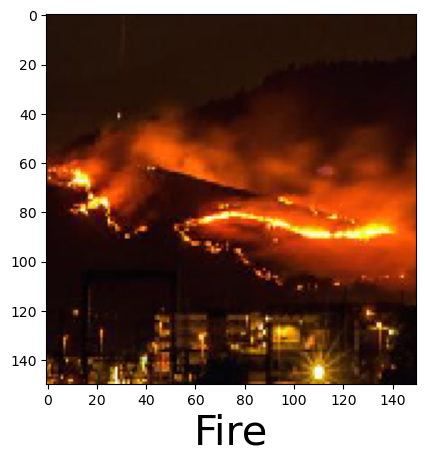

In [18]:
predictImage("C:/Users/lenovo/OneDrive/Desktop/Forest_Fire_Detection/forest_fire/Testing/fire/abc182.jpg")

1/1 [==============================] - 0s 27ms/step


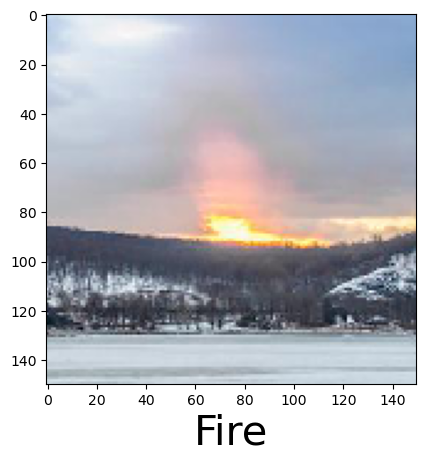

In [19]:
predictImage("C:/Users/lenovo/OneDrive/Desktop/Forest_Fire_Detection/forest_fire/Testing/fire/abc184.jpg")

1/1 [==============================] - 0s 25ms/step


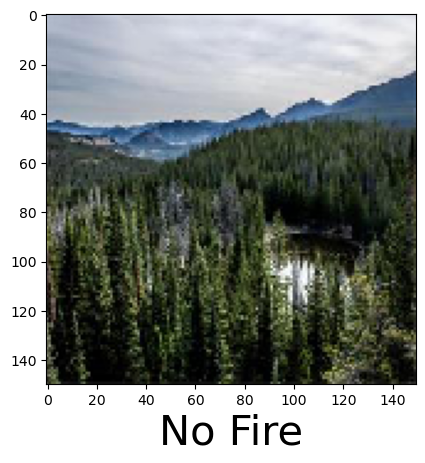

In [20]:
predictImage("C:/Users/lenovo/OneDrive/Desktop/Forest_Fire_Detection/forest_fire/Testing/nofire/abc379.jpg")

1/1 [==============================] - 0s 26ms/step


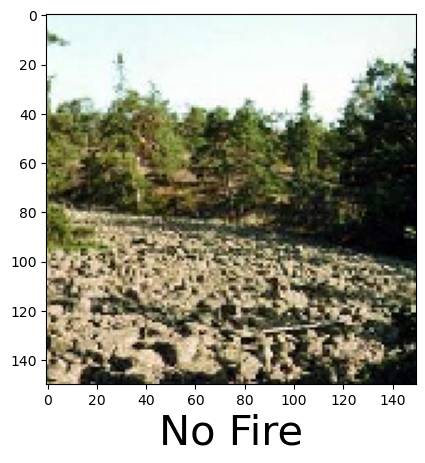

In [21]:
predictImage("C:/Users/lenovo/OneDrive/Desktop/Forest_Fire_Detection/forest_fire/Testing/nofire/abc369.jpg")